In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [ ]:
customer_df = pd.read_csv('customers.csv')

An automobile company has plans to enter new markets with their existing products. After intensive market research, they’ve decided that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy for the new markets.

You are required to help the manager to predict the right group of the new customers.

## Data Exploration

In [ ]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [ ]:
customer_df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
customer_df.shape

(10695, 11)

In [ ]:
customer_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [ ]:
customer_df_cleaned = customer_df.dropna(axis=0)

In [ ]:
customer_df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
customer_df_cleaned.shape

(8819, 11)

In [ ]:
customer_df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
customer_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
customer_df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
customer_df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
customer_df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [ ]:
customer_df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [ ]:
customer_df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [ ]:
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [ ]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [ ]:
customers_1 = customer_df_cleaned.copy()

In [ ]:
customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [ ]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
le = LabelEncoder()

In [ ]:
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

In [ ]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [ ]:
customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)

In [ ]:
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [ ]:
customers_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [ ]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [ ]:
y1 = customers_1[['Segmentation']].values

In [ ]:
one_hot_enc = OneHotEncoder()

In [ ]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [ ]:
y1.shape

(8819, 1)

In [ ]:
y = one_hot_enc.transform(y1).toarray()

In [ ]:
y.shape

(8819, 4)

In [ ]:
y1[0]

array([3])

In [ ]:
y[0]

array([0., 0., 0., 1.])

In [ ]:
X.shape

(8819, 8)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)

In [ ]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [ ]:
X_train.shape

(5908, 8)

In [ ]:
scaler_age = MinMaxScaler()

In [ ]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [ ]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [ ]:
# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [ ]:
# Creating the model
ai_brain = Sequential([
  Dense(units = 8, input_shape=[8]),
  Dense(units =16, activation='relu'),

  Dense(units =4, activation ='softmax')
])

In [ ]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=500,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/400
24/24 [==============================] - 0s 10ms/step - loss: 1.1570 - accuracy: 0.4882 - val_loss: 1.2002 - val_accuracy: 0.4655
Epoch 2/400
24/24 [==============================] - 0s 4ms/step - loss: 1.1581 - accuracy: 0.4853 - val_loss: 1.2010 - val_accuracy: 0.4662
Epoch 3/400
24/24 [==============================] - 0s 4ms/step - loss: 1.1568 - accuracy: 0.4853 - val_loss: 1.1982 - val_accuracy: 0.4662
Epoch 4/400
24/24 [==============================] - 0s 4ms/step - loss: 1.1571 - accuracy: 0.4861 - val_loss: 1.1990 - val_accuracy: 0.4665
Epoch 5/400
24/24 [==============================] - 0s 4ms/step - loss: 1.1562 - accuracy: 0.4875 - val_loss: 1.1985 - val_accuracy: 0.4675
Epoch 6/400
24/24 [==============================] - 0s 4ms/step - loss: 1.1583 - accuracy: 0.4873 - val_loss: 1.1990 - val_accuracy: 0.4648
Epoch 7/400
24/24 [==============================] - 0s 4ms/step - loss: 1.1572 - accuracy: 0.4882 - val_loss: 1.1999 - val_accuracy: 0.4675
Epoch 8/400


In [ ]:
metrics = pd.DataFrame(ai_brain.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.157493,0.487136,1.198848,0.465819
1,1.158837,0.482397,1.198965,0.465819
2,1.157597,0.486798,1.199478,0.467880
3,1.158142,0.482905,1.200812,0.463758
4,1.157422,0.485274,1.199024,0.467193


<Axes: >

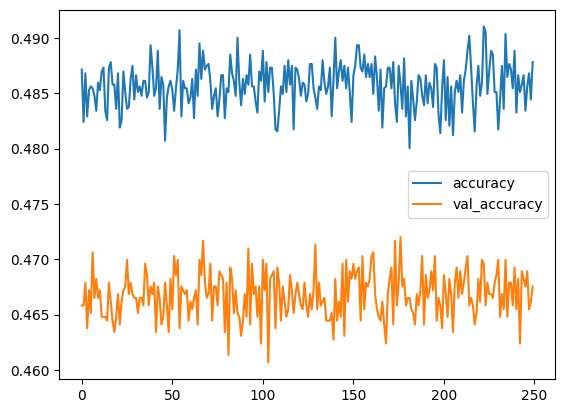

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

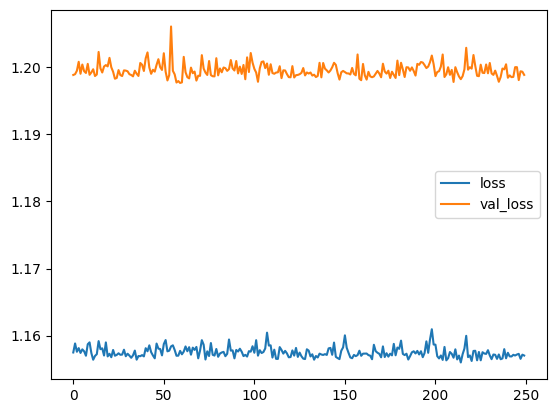

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
# Sequential predict_classes function is deprecated
# predictions = ai_brain.predict_classes(X_test)
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

91/91 [==============================] - 0s 1ms/step


In [ ]:
x_test_predictions.shape

(2911,)

In [ ]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [ ]:
y_test_truevalue.shape

(2911,)

In [ ]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[332 134 124 167]
 [203 165 209 109]
 [119 128 355  84]
 [167  70  67 478]]


In [ ]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42       757
           1       0.33      0.24      0.28       686
           2       0.47      0.52      0.49       686
           3       0.57      0.61      0.59       782

    accuracy                           0.46      2911
   macro avg       0.44      0.45      0.45      2911
weighted avg       0.45      0.46      0.45      2911



In [ ]:
# Saving the Model
ai_brain.save('customer_classification_model.h5')

In [ ]:
# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)

In [ ]:
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')

In [ ]:
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

# Prediction for a single input

In [ ]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 63ms/step


In [ ]:
print(x_single_prediction)

[2]


In [ ]:
print(le.inverse_transform(x_single_prediction))

['C']
